## Importaciones e instalaciones

In [8]:
%pip install pandas
%pip install ucimlrepo certifi
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install numpy

import pandas as pd # type: ignore
from ucimlrepo import fetch_ucirepo # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # type: ignore
from sklearn.neighbors import KNeighborsRegressor # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import numpy as np # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Preprocesamiento de los datos


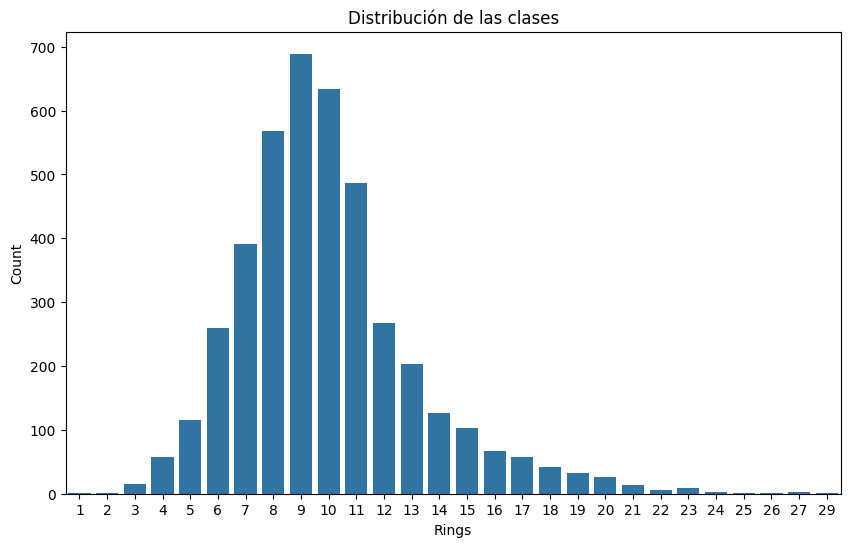

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [9]:
#Carga de datos
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

#Verificamos la distribucion de clases ya que esta influir en el rendimiento del modelo
data = pd.concat([X, pd.DataFrame(y, columns=['Rings'])], axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=data)
plt.title('Distribución de las clases')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()
y


## Raw data(not filtered)

In [10]:
data_preprocessed_features = X.copy()
data_preprocessed_features = pd.get_dummies(data_preprocessed_features, columns=['Sex'], dtype=int)
data_preprocessed_features

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


## Raw data(only low correlation features)

In [11]:
data_preprocessed_features_lowCorr = X.copy()

data_preprocessed_features_lowCorr.drop(['Length','Diameter','Height','Whole_weight','Sex'],axis=1)
data_preprocessed_features_lowCorr

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


## FUNCION PARA CLASIFICAR LOS ANILLOS
* Ajustar esto a los modelos de cada uno!!!!


In [12]:
#thresholds = [8, 11, 15]
# def group_rings(ring):
#     if ring <= thresholds[0]:
#         return 0
#     elif ring <= thresholds[1]:
#         return 1
#     elif ring <= thresholds[2]:
#         return 2
#     else:
#         return 3

# #Aplicar la función a las predicciones
# y_pred_grouped = np.array([group_rings(r) for r in y_pred])
# y_test_grouped = np.array([group_rings(r) for r in y_test_svc])

### Eliminamos cualquier fila cuyo numero de rings no aparezca almenos 100 veces en el dataset

In [13]:

y_counts = data['Rings'].value_counts()
filtered_indices = y_counts[y['Rings'].value_counts() >= 100].index
filtered_X = X.loc[y.index[y['Rings'].isin(filtered_indices)]]
filtered_y = y.loc[y['Rings'].isin(filtered_indices)]
print(filtered_y['Rings'].value_counts())
filtered_y


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64


,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


### Pairplot: Verificamos la dispersion de las caracteristicas para ver como se separan en el espacio y la correlacion que poseen unas con otras

<Figure size 1200x800 with 0 Axes>

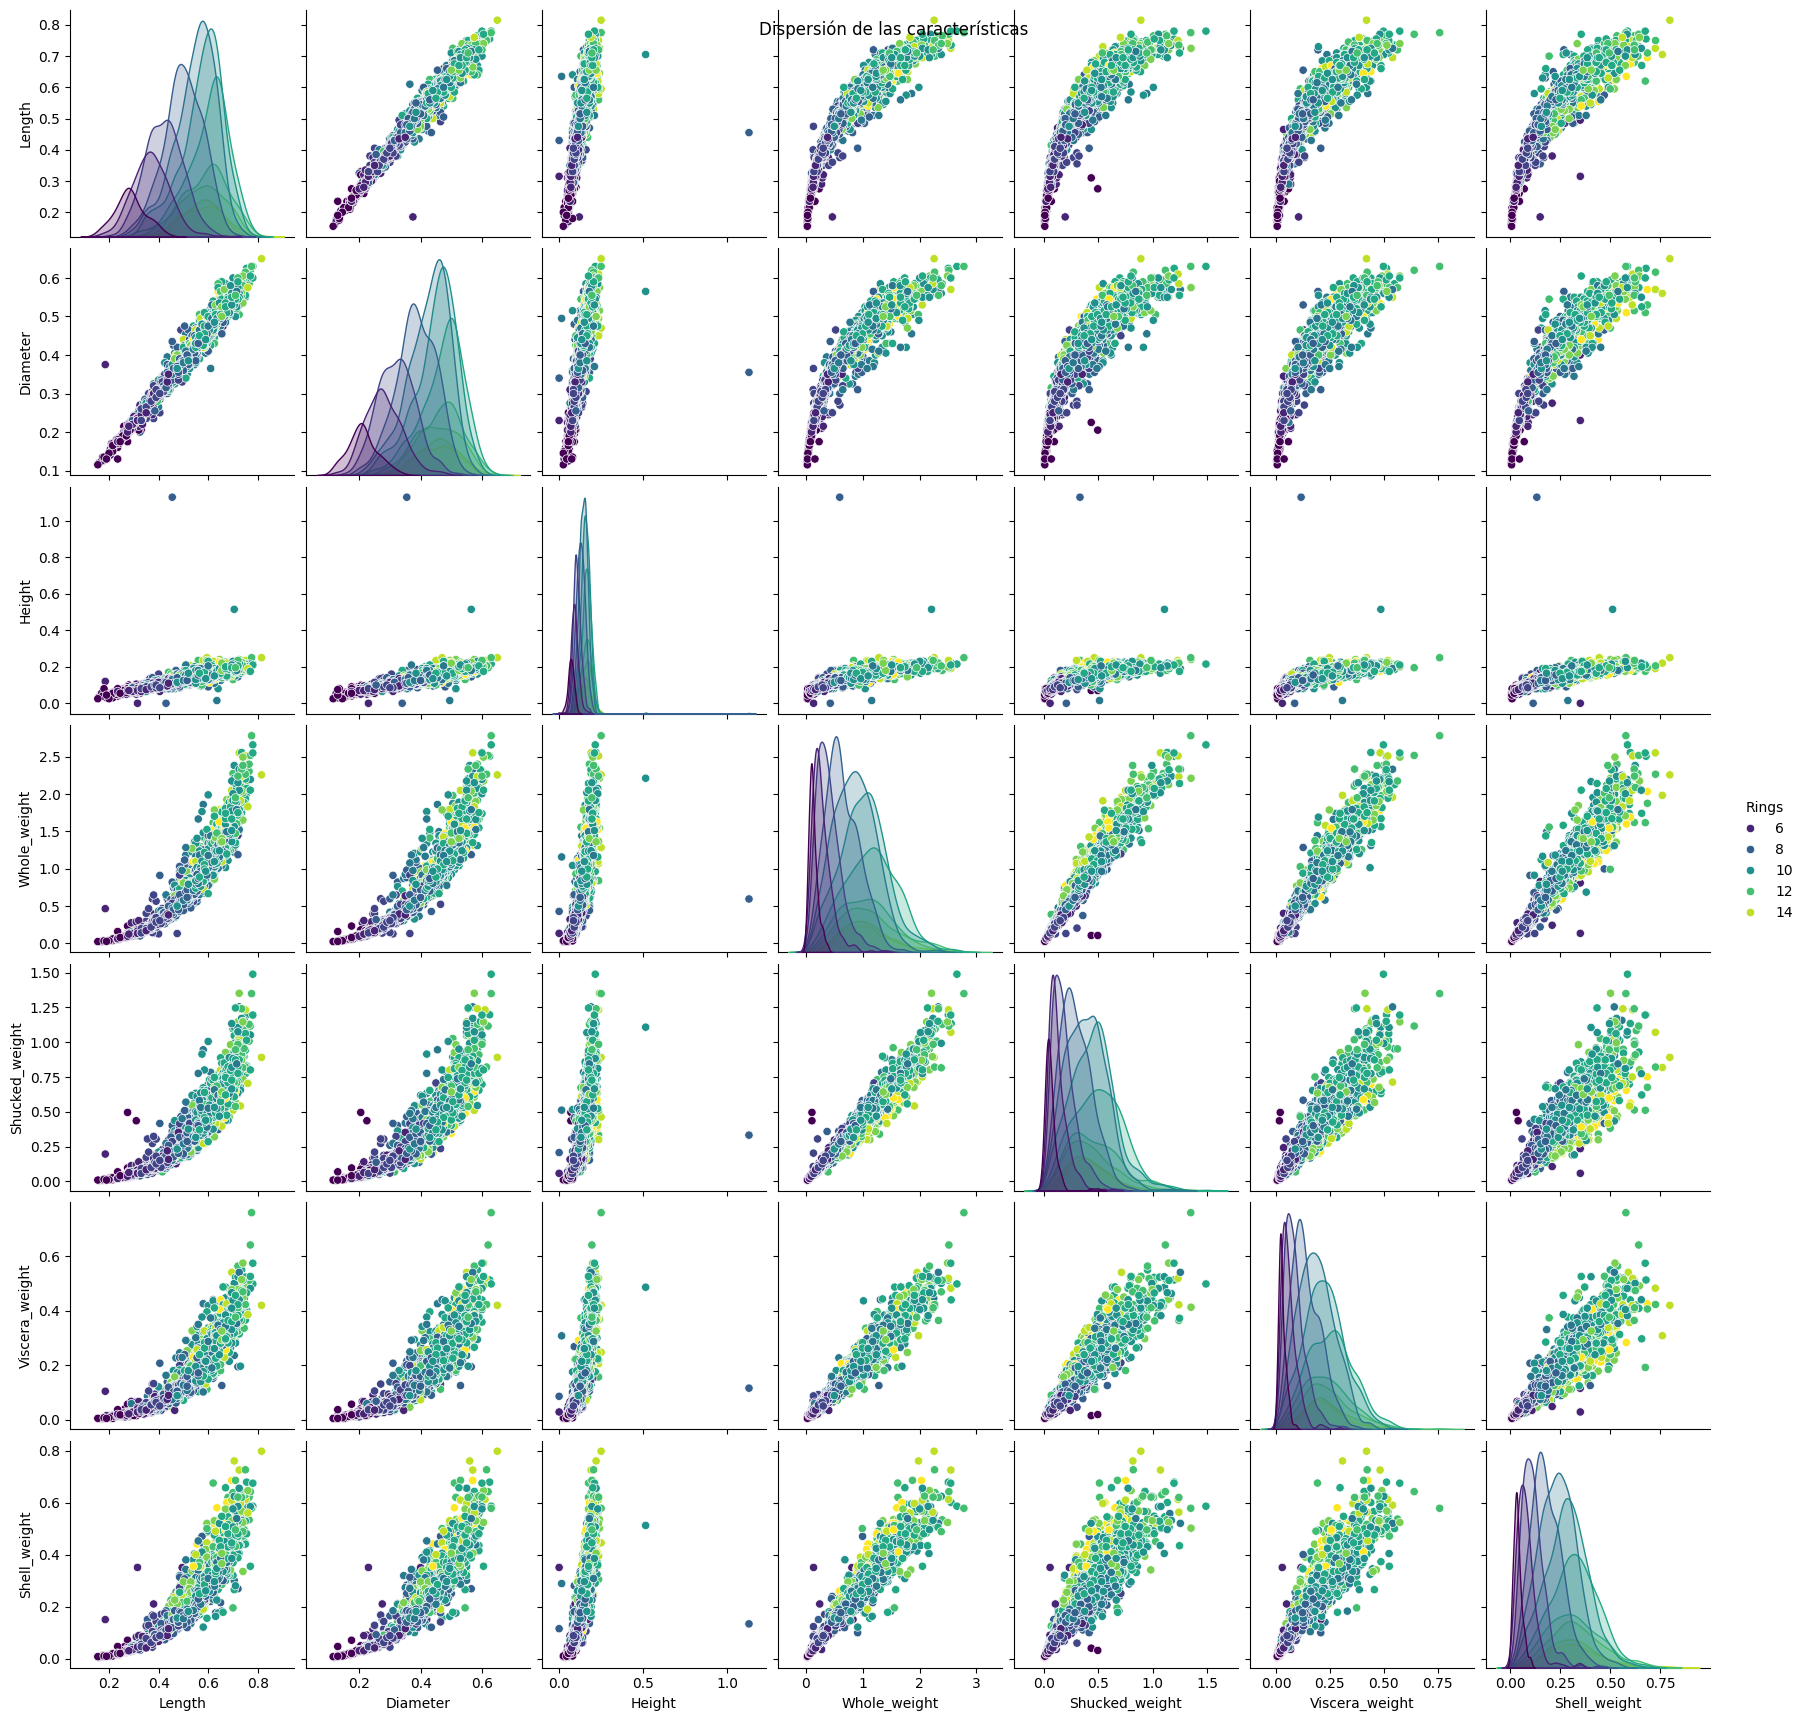

In [14]:
plt.figure(figsize=(12, 8))
data = pd.concat([filtered_X, pd.DataFrame(filtered_y, columns=['Rings'])], axis=1)
sns.pairplot(data=data, hue='Rings', palette='viridis')
plt.suptitle('Dispersión de las características')
plt.show()

## Data y cols seleccionadas


In [15]:
X_selected = filtered_X[['Shucked_weight', 'Shell_weight', 'Viscera_weight']]
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_selected, filtered_y, test_size=0.2, random_state=0)

## Modelo KNN

In [16]:
#Modelo KnnRegressor
knn = KNeighborsRegressor(n_neighbors=28)
knn.fit(X_train_svc, y_train_svc)

#Validacion cruzada
cv_scores = cross_val_score(knn, X_train_svc, y_train_svc, cv=3, scoring='neg_mean_squared_error')
mean_mse = np.mean(cv_scores)
y_pred_knn = knn.predict(X_test_svc)
mae = mean_absolute_error(y_test_svc, y_pred_knn)
mse = mean_squared_error(y_test_svc, y_pred_knn)
r2 = r2_score(y_test_svc, y_pred_knn)

#Escritura
print("Error cuadratico m (variabilidad de predicciones):", mean_mse)
print("Diff entre real y prediccion:", mae)
print("Error cuadratico:", r2)


Error cuadratico m (variabilidad de predicciones): -2.618941983162358
Diff entre real y prediccion: 1.2662084339587591
Error cuadratico: 0.4979517848680949


## Porque es tan bajo el desempeño del modelo KNN?

* Si bien se intento contrarrestar el desbalance de caracteristicas eligiendo solo las que tuvieran un numero suficiente de entradas, se perdio la suficiente informacion para que el desempeño no mejorara notablemente.

* Se puede apreciar que las clases no están claramente separadas en el espacio de características, lo que puede hacer que el modelo tenga dificultades para distinguir entre ellas, ya que se basa en la suposición de que puntos cercanos en el espacio de características.


## Modelo RFC(Random Forest Classifier)

In [17]:

grid_rf = {'max_depth': list(range(10, 200, 10))}#Evalua multiples profundidades para el arbol para decidir cual es la mejor
rf = RandomForestClassifier(random_state=42)#Modelo
scores = cross_val_score(rf, X_selected, filtered_y, cv=3, scoring='accuracy')#Cross validation con 3 conjuntos
grid_search = GridSearchCV(estimator=rf, param_grid=grid_rf, cv=3, n_jobs=-1)# n_jobs = -1 means usar todos los procesadores, CV = cross validation
grid_search.fit(X_train_svc, y_train_svc)#Fitting the model with gridSearch

C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120, 130, 140, 150, 160, 170, 180,
                                       190]})

In [18]:
best_params = grid_search.best_params_
print(best_params) # {'max_depth': 100}

{'max_depth': 10}


In [19]:
best_rf = RandomForestClassifier(max_depth=best_params['max_depth'], random_state=42)
best_rf.fit(X_train_svc, y_train_svc)
y_pred_rfc = best_rf.predict(X_test_svc)

C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:

accuracy = accuracy_score(y_test_svc, y_pred_rfc)
precision = precision_score(y_test_svc, y_pred_rfc, average='macro')## 'macro'Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
recall = recall_score(y_test_svc, y_pred_rfc, average='macro')

print("Promedio de accuracy en validación cruzada para RFC:", scores.mean())
print(f'Accuracy para RFC: {accuracy:.3f}')
print(f'Precision para RFC: {precision:.3f}')
print(f'Recall para RFC: {recall:.3f}')

Promedio de accuracy en validación cruzada para RFC: 0.2522107972287276
Accuracy para RFC: 0.274
Precision para RFC: 0.249
Recall para RFC: 0.245


## Conclusiones con RFC

* Al igual que el modelo del KNN las metricas resultantes son muy bajas, esto nos empieza a dar una idea de que el problema en general recae en la naturaleza de los datos.

* Para aumentar la eficacia del modelo RFC, se usaron varias tecnicas muy sencillas, entre ellas eluso de gridSearch y la busqueda de la mejor profundidad para el arbol evaluando con varios valores

##  Support Vectorial Machine(SVC), using SVR(Support Vectorial Regressor ) for continous values

In [21]:


X_svc = data_preprocessed_features
y_svc =y['Rings']
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_svc)
X_test_scaled = scaler.transform(X_test_svc)

model = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovr')  # 'ovo' para clasificación multiclase
model.fit(X_train_scaled, y_train_svc)
y_pred = model.predict(X_test_scaled)


thresholds = [8, 11, 15]


def group_rings(ring):
    if ring <= thresholds[0]:
        return 0
    elif ring <= thresholds[1]:
        return 1
    elif ring <= thresholds[2]:
        return 2
    else:
        return 3

# Aplicar la función a las predicciones
y_pred_grouped = np.array([group_rings(r) for r in y_pred])
y_test_grouped = np.array([group_rings(r) for r in y_test_svc])
accuracy = accuracy_score(y_test_grouped, y_pred_grouped)
precision = precision_score(y_test_grouped, y_pred_grouped, average='macro')
Recall = recall_score(y_test_grouped, y_pred_grouped, average='macro')
f1_score_svc = f1_score(y_test_grouped, y_pred_grouped, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", Recall)
print("F1_score:", f1_score_svc)


Accuracy: 0.5861244019138756
Precision: 0.5691042748757794
Recall: 0.3923923220973783
F1_score: 0.34968072218785384


C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Resultados de SVC
* En este caso se creo una funcion que define en que grupo caera cierto 'abalone' dependiendo de su numero de anillos. es notable el mejoramiento del modelo, pasamos de 0.23 a 0.58.

* Aqui en el SVC no se uso el filtered_y donde se toma el conteo de los abalone con cierto numero de 'Rings', aqui se toma y que es el target en 'Raw'

<h1>Estimadores Bayesianos Ingenuos</h1>

In [26]:
np.random.seed(42)

X_nb = data_preprocessed_features
y_nb = y['Rings']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=40)

# Estandarizar las características
scaler = MinMaxScaler()
X_train_scaled_nb = scaler.fit_transform(X_train_nb)
X_test_scaled_nb = scaler.transform(X_test_nb)

# Crear y entrenar el modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_scaled_nb, y_train_nb)
y_pred_nb = model_nb.predict(X_test_scaled_nb)

# Definir los umbrales para agrupar los anillos
thresholds = [8, 11, 15]

def group_rings(ring):
    if ring <= thresholds[0]:
        return 0
    elif ring <= thresholds[1]:
        return 1
    elif ring <= thresholds[2]:
        return 2
    else:
        return 3

# Aplicar la función a las predicciones
y_pred_grouped_nb = np.array([group_rings(r) for r in y_pred_nb])
y_test_grouped_nb = np.array([group_rings(r) for r in y_test_nb])

# Calcular los indicadores de desempeño
accuracy_nb = accuracy_score(y_test_grouped_nb, y_pred_grouped_nb)
precision_nb = precision_score(y_test_grouped_nb, y_pred_grouped_nb, average='macro')
recall_nb = recall_score(y_test_grouped_nb, y_pred_grouped_nb, average='macro')
f1_nb = f1_score(y_test_grouped_nb, y_pred_grouped_nb, average='macro')

print("Naive Bayes - Desempeño del Modelo")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1_score:", f1_nb)


Naive Bayes - Desempeño del Modelo
Accuracy: 0.33851674641148327
Precision: 0.3450997838236845
Recall: 0.4288889598229486
F1_score: 0.25106312468517195


C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fijar la semilla aleatoria
np.random.seed(42)

# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
data = pd.read_csv(url, names=column_names)

# Convertir la variable categórica "Sex" a numérica
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Rings', axis=1)
y = data['Rings']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Estandarizar las características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Definir los umbrales para agrupar los anillos
thresholds = [8, 11, 15]

def group_rings(ring):
    if ring <= thresholds[0]:
        return 0
    elif ring <= thresholds[1]:
        return 1
    elif ring <= thresholds[2]:
        return 2
    else:
        return 3

# Aplicar la función a las predicciones
y_pred_grouped = np.array([group_rings(r) for r in y_pred])
y_test_grouped = np.array([group_rings(r) for r in y_test])

# Calcular los indicadores de desempeño
accuracy = accuracy_score(y_test_grouped, y_pred_grouped)
precision = precision_score(y_test_grouped, y_pred_grouped, average='macro')
recall = recall_score(y_test_grouped, y_pred_grouped, average='macro')
f1 = f1_score(y_test_grouped, y_pred_grouped, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)


Accuracy: 0.5657894736842105
Precision: 0.3948281483560353
Recall: 0.41032728975144706
F1_score: 0.37234343578528817


C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
